In [2]:
library(phyloseq)
library(ggplot2)
library(vegan)
library(readr)
library(data.table)
library(dplyr)
library(picante)
library(car)
library(dunn.test)
library(ggpubr)

#### Read in data

In [3]:
batrun_nt = readRDS("/gpfs/data/gilbert-lab/Lutz/Epomophorus/RDSfiles/bat_nt.rds")
sample_tab = read.csv("/gpfs/data/gilbert-lab/Lutz/Epomophorus/Raw_data/DMR_mapfile.csv")

### Shannon Index * Sex/Pregnancy

In [17]:
sha = estimate_richness(batrun_nt, split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)

dfsha = merge(sha, sample_tab, on="SampleID")

stats = dfsha %>%
    group_by(Sex, Pregnant) %>%
    summarize(median = median(Shannon), 
              mean = mean(Shannon),
              sd = sd(Shannon),
              sem = sd(Shannon/sqrt(length(Shannon)))) %>%
    arrange(-desc(mean))
stats

Sex,Pregnant,median,mean,sd,sem
Female,Nonpregnant,1.131684,1.283250,0.4916191,0.1738136
Male,Male,1.536197,1.356160,0.6247899,0.1202409
Female,Pregnant,1.597140,1.707214,0.7696092,0.2221670


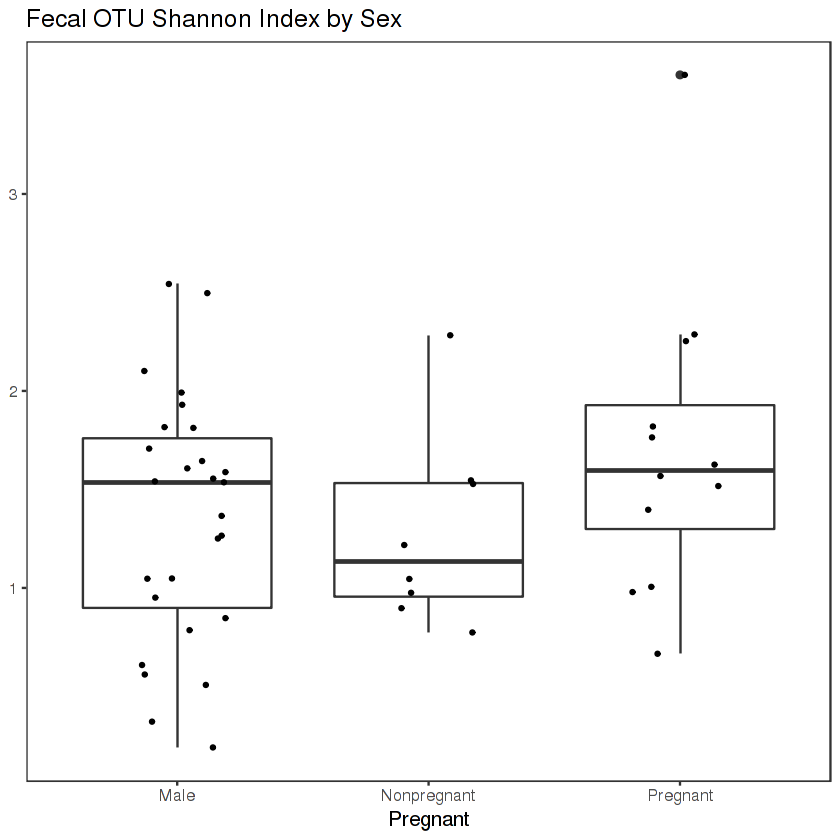

In [18]:
p = ggplot(dfsha, aes(x = Pregnant, y = Shannon)) + ggtitle("Fecal OTU Shannon Index by Sex")

p = p + geom_boxplot() + ylab("Shannon Index")

#p = p + geom_point(size = .75, aes(color = SampleType),  
#                   position = position_jitter(h = 0, w = 0.2))

p = p + geom_point(size = .75,  
                   position = position_jitter(h = 0, w = 0.2))

p = p + theme_bw() + theme(text=element_text(size=12, color="black",family="Arial"),
                           legend.key = element_blank(),
                           #legend.position = "none",
                           axis.title.y=element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank())
p

In [19]:
stats.krusk = kruskal.test(Shannon~Pregnant, data=dfsha)
stats.krusk


	Kruskal-Wallis rank sum test

data:  Shannon by Pregnant
Kruskal-Wallis chi-squared = 2.3887, df = 2, p-value = 0.3029


### Observed OTU Diversity * Sex/Pregnancy

In [14]:
obs = estimate_richness(batrun_nt, split = TRUE, measures = "Observed")
obs$SampleID = rownames(obs)

dfobs = merge(obs, sample_tab, on="SampleID")

stats = dfobs %>%
    group_by(Sex, Pregnant) %>%
    summarize(median = median(Observed), 
              mean = mean(Observed),
              sd = sd(Observed),
              sem = sd(Observed/sqrt(length(Observed)))) %>%
    arrange(-desc(mean))
stats

Sex,Pregnant,median,mean,sd,sem
Female,Nonpregnant,31.5,39.25000,16.74813,5.921360
Female,Pregnant,43.0,41.91667,15.76797,4.551820
Male,Male,33.0,42.48148,30.88362,5.943555


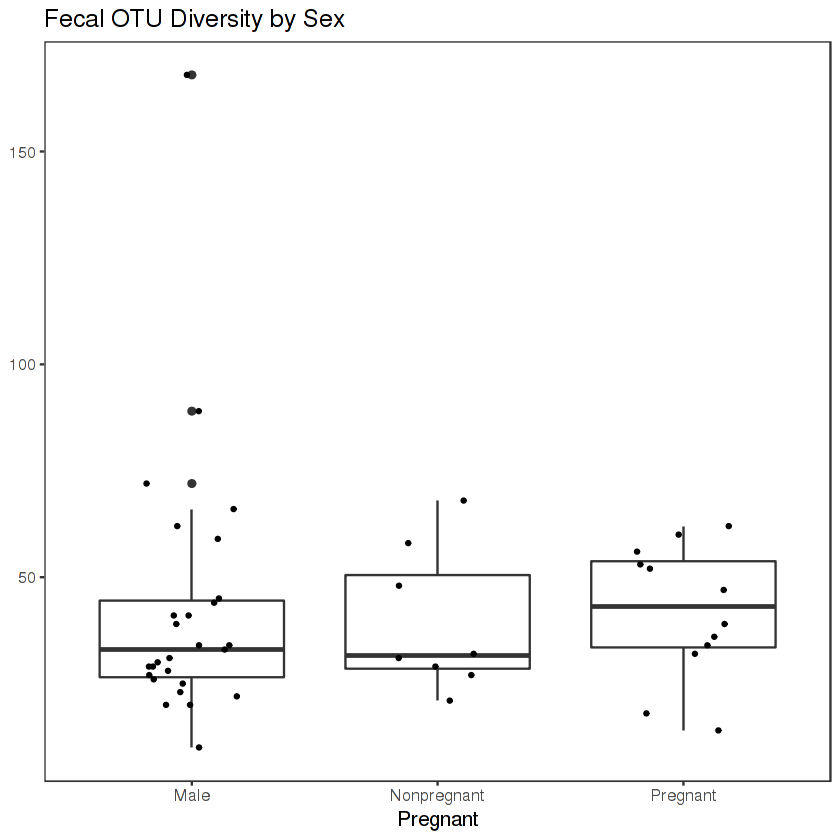

In [15]:
p = ggplot(dfobs, aes(x = Pregnant, y = Observed)) + ggtitle("Fecal OTU Diversity by Sex")

p = p + geom_boxplot() + ylab("Observed OTUs")

#p = p + geom_point(size = .75, aes(color = SampleType),  
#                   position = position_jitter(h = 0, w = 0.2))

p = p + geom_point(size = .75,  
                   position = position_jitter(h = 0, w = 0.2))

p = p + theme_bw() + theme(text=element_text(size=12, color="black",family="Arial"),
                           legend.key = element_blank(),
                           #legend.position = "none",
                           axis.title.y=element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank())
p

In [16]:
stats.krusk = kruskal.test(Observed~Pregnant, data=dfobs)
stats.krusk


	Kruskal-Wallis rank sum test

data:  Observed by Pregnant
Kruskal-Wallis chi-squared = 0.85208, df = 2, p-value = 0.6531


#### Assumption of normality check

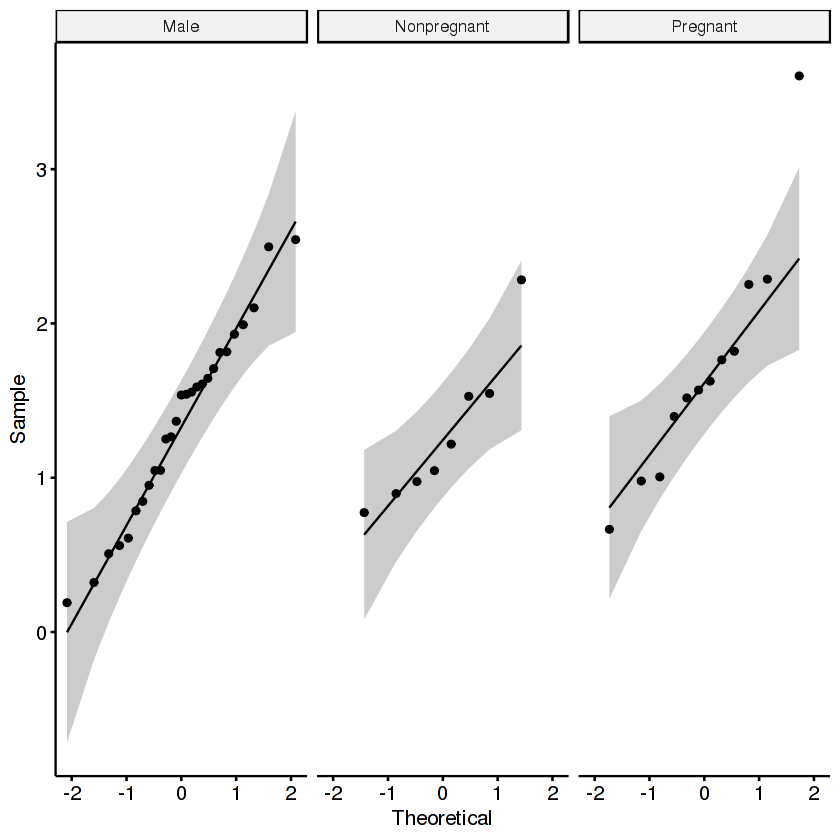

In [20]:
p = ggqqplot(dfsha, x = "Shannon")
p = p + facet_wrap("Pregnant")
p

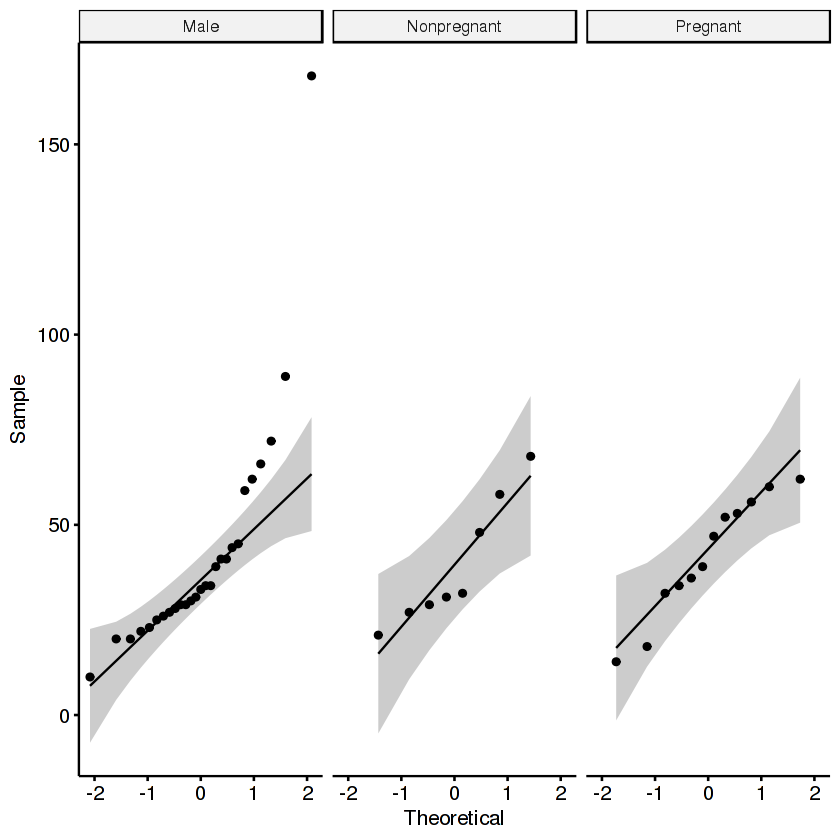

In [21]:
p = ggqqplot(dfobs, x = "Observed")
p = p + facet_wrap("Pregnant")
p